### 03_ml_03: ML3 Clustering

This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981).

Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the credibility of a mushroom; no rule like "leaflets three, let it be'' for Poisonous Oak and Ivy.


**Complete class MushroomClassifier from given code template below.**

In [ ]:
!pip install scikit-learn

Step 1. Load ‘ModifiedEdibleMushroom.csv’ data from the “Attachment” (note: this data set has been preliminarily prepared.).

Step 2. Choose edible mushrooms only.

Step 3. Only the variables below have been selected to describe the distinctive characteristics of edible mushrooms:
'cap-color-rate','stalk-color-above-ring-rate'

Step 4. Provide a proper data preprocessing as follows:
- Fill missing with mean.
- Standardize variables with Standard Scaler.

Step 5. K-means clustering with 5 clusters (n_clusters=5, random_state=0, n_init='auto').

Step 6. Show the maximum centroid of 2 features ('cap-color-rate' and 'stalk-color-above-ring-rate') in 2 digits.

Step 7. Convert the centroid value to the original scale, and show the minimum centroid of 2 features in 2 digits.


In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
import numpy as np
class Clustering:
    def __init__(self, file_path): # DO NOT modify this line
        # Add other parameters if needed
        self.file_path = file_path 
        self.df = pd.read_csv(file_path)

    def Q1(self): # DO NOT modify this line
        """
        Step1-4
            1. Load the CSV file.
            2. Choose edible mushrooms only.
            3. Only the variables below have been selected to describe the distinctive
               characteristics of edible mushrooms:
               'cap-color-rate','stalk-color-above-ring-rate'
            4. Provide a proper data preprocessing as follows:
                - Fill missing with mean
                - Standardize variables with Standard Scaler
        """
        # remove pass and replace with you code
        self.df = self.df[self.df['label'] == 'e']
        self.df = self.df[['cap-color-rate', 'stalk-color-above-ring-rate']]

        self.pipeline = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('normalize', StandardScaler())
        ])
        self.df = self.pipeline.fit_transform(self.df)
        
        return self.df.shape

    def Q2(self): # DO NOT modify this line
        """
        Step5-6
            5. K-means clustering with 5 clusters (n_clusters=5, random_state=0, n_init='auto')
            6. Show the maximum centroid of 2 features ('cap-color-rate' and 'stalk-color-above-ring-rate') in 2 digits.
        """
        # remove pass and replace with you code
        self.Q1()
        
        kmeans = KMeans(n_clusters=5, random_state=0, n_init="auto")
        kmeans.fit(self.df)

        self.centroids = kmeans.cluster_centers_
        centroids_of_interest = self.centroids.max(axis=0)
        centroids_of_interest = [round(v, 2) for v in centroids_of_interest]

        return np.array(centroids_of_interest)

    def Q3(self): # DO NOT modify this line
        """
        Step7
            7. Convert the centroid value to the original scale, and show the minimum centroid of 2 features in 2 digits.

        """
        # remove pass and replace with you code
        self.Q2()

        scaler = self.pipeline.named_steps['normalize']
        centroids_original = scaler.inverse_transform(self.centroids)
        centroids_of_interest = centroids_original.min(axis=0)
        centroids_of_interest = [round(v, 2) for v in centroids_of_interest]    
        
        return np.array(centroids_of_interest)

**Run the code below to only test that your code can work, and there is no need to submit it to the grader.**

In [4]:
def main():
    hw = Clustering('ModifiedEdibleMushroom.csv')

    # Get the input command from the user
    # input_string = input().strip()
    # input_string = "Q2"
    
    # Dynamically call the method on the hw object and print the result
    # input_command = f"hw.{input_string}()"
    # print(f"{eval(input_command)}")
    # print(hw.Q1())
    print(hw.Q2())
    # print(hw.Q3())
    

if __name__ == "__main__":
    main()

[2.51 2.3 ]


In [10]:
df = pd.read_csv('ModifiedEdibleMushroom.csv')
df = df[df['label'] == 'e']
df = df[['cap-color-rate', 'stalk-color-above-ring-rate']]
df

,cap-color-rate,stalk-color-above-ring-rate
1,2.0,1.0
2,3.0,1.0
4,4.0,1.0
5,2.0,1.0
6,3.0,1.0
...,...,...
5815,1.0,7.0
5819,1.0,7.0
5820,1.0,7.0
5821,1.0,7.0


In [14]:
df.isnull().sum()

cap-color-rate                  6
stalk-color-above-ring-rate    28
dtype: int64

In [23]:
pipeline = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('normalize', StandardScaler())
    ])
df = pipeline.fit_transform(df)
# num_imputer = SimpleImputer(strategy='mean')
# scaler = StandardScaler()

In [28]:
kmeans = KMeans(n_clusters=5, random_state=0, n_init="auto")
kmeans.fit(df)

KMeans(n_clusters=5, random_state=0)

In [47]:
centroids = kmeans.cluster_centers_
centroids_of_interest = centroids.max(axis=0)
centroids_of_interest = [round(v, 2) for v in centroids_of_interest]

In [40]:
centroids

array([[ 0.69701187,  0.3582104 ],
       [-1.21998586,  2.30140606],
       [ 0.30323849, -0.65383856],
       [ 2.5059661 , -0.74760802],
       [-1.22906193, -0.29354739]])

In [66]:
scaler = pipeline.named_steps['normalize']
centroids_original = scaler.inverse_transform(centroids)
centroids_original

array([[4.85931559, 3.08618871],
       [1.03163575, 6.75213675],
       [4.07306613, 1.17690136],
       [8.47126437, 1.        ],
       [1.01351351, 1.85661095]])

In [73]:
feature_indices = ['cap-color-rate', 'stalk-color-above-ring-rate']
centroids_of_interest = centroids[:, [df.columns.get_loc(feature) for feature in feature_indices]]

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [69]:
centroids_of_interest = centroids_original.min(axis=0)
centroids_of_interest = [round(v, 2) for v in centroids_of_interest]

In [70]:
centroids_of_interest

[np.float64(1.01), np.float64(1.0)]

In [60]:
df

array([[-0.73500484, -0.74760802],
       [-0.23417985, -0.74760802],
       [ 0.26664515, -0.74760802],
       ...,
       [-1.23582983,  2.43279003],
       [-1.23582983,  2.43279003],
       [-1.23582983,  2.43279003]], shape=(2104, 2))

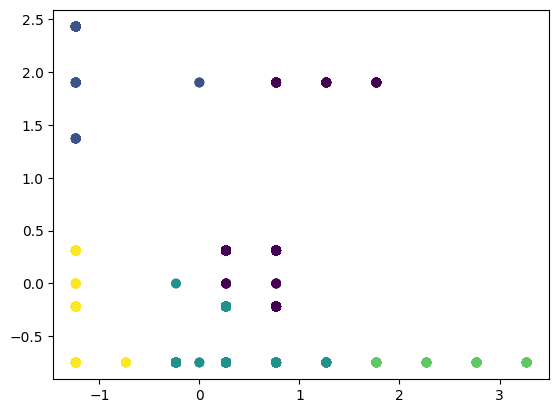

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df[:, 0], df[:, 1], c=kmeans.labels_)